


# 625 Spring 2023 : Homework 4, Coding

There are five sections below, corresponding to three coding assignments. Implement and test (note that Problem 11 is a no-credit exercise). 


# Problem 6 : Infogain



In [ ]:
'''
PROBLEM 6

- implement the functions in this code cell for problem 6.

'''

import math
import numpy as np

#--------------------------
# my_log function: implement this and use it in entropy() 
#--------------------------
def my_log(val):
  '''
  implement this
  '''
  if val == 0:
    return 0
  # must take care of the val=0 case.
  # - right now it will cause an error when my_log(0) is called. 
  return math.log2(val)


#--------------------------
# entropy function: implement this and use it in infogain() 
#--------------------------
def entropy(pos_neg):
  '''
  implement this

  input:
  pos_neg is a list  [n, m], where
  n is the number of positive samples, and
  m is the number of negative samples
 
  returns:
  entropy value

  '''

  pos = pos_neg[0]
  neg = pos_neg[1]
  prob_pos = pos/(pos+neg)
  prob_neg = 1-prob_pos

  # compute entropy 
  # ...
  # ...
  # return ....
  return -prob_pos * my_log(prob_pos) - prob_neg * my_log(prob_neg)

#--------------------------
# infogain function: define this and test
#--------------------------
def infogain (before, after):
  '''
  implement this

  input:
    before: [n, m], for pos# and neg#
    after: [[n1, m1], [n2, m2], [n3, m3], ... ], 
      for pos# and neg# for the different splits. 
    * example: 
      before = [6,6]
      after  = [ [0,2], [4,0], [2,4] ] 

  returns: infogain value
  '''

  # 1. entropy before split
  initial = entropy(before)
  total = before[0] + before[1]

  # 2. entropy after split
  for split in after:
    count = split[0] + split[1]
    newEntropy = entropy(split)
    initial = initial - (count/total)*newEntropy

  # 4. return
  # return gain 
  return initial 

#--------------------------
# test entropy
#--------------------------
print(entropy([10,10]))
print(entropy([2,5]))

#--------------------------
# test infogain
#--------------------------
pre = [6,6]
post  = [ [0,2], [4,0], [2,4] ]
print('info gain: ')
print(infogain(pre, post))

1.0
0.863120568566631
info gain: 
0.5408520829727552


In [ ]:
# Add your test code here, for the homework questions
pre = [4,4]
post  = [ [2,2], [1,3]]
print('Table 1 Commute info gain: ')
print(infogain(pre, post))
pre = [4,4]
post  = [ [4,1], [0,3]]
print('Table 1 JobType info gain: ')
print(infogain(pre, post))
pre = [4,4]
post  = [ [1,3], [3,1]]
print('Table 1 Location info gain: ')
print(infogain(pre, post))
pre = [4,4]
post  = [ [3,0], [2,3]]
print('Table 1 StockOption info gain: ')
print(infogain(pre, post))

print('---------------------------------')

pre = [6,6]
post  = [ [4,0], [2,4], [0,2]]
print('Table 2 Pat info gain: ')
print(infogain(pre, post))
pre = [6,6]
post  = [ [5,2], [1,4]]
print('Table 2 Hun info gain: ')
print(infogain(pre, post))
pre = [6,6]
post  = [ [1,1], [2,2], [2,2], [1,1]]
print('Table 2 Type info gain: ')
print(infogain(pre, post))
pre = [6,6]
post  = [ [2,3], [4,3]]
print('Table 2 Fri info gain: ')
print(infogain(pre, post))



Table 1 Commute info gain: 
0.09436093777043358
Table 1 JobType info gain: 
0.5487949406953986
Table 1 Location info gain: 
0.1887218755408671
Table 1 StockOption info gain: 
0.3931558784658321
---------------------------------
Table 2 Pat info gain: 
0.5408520829727552
Table 2 Hun info gain: 
0.19570962879973092
Table 2 Type info gain: 
2.7755575615628914e-17
Table 2 Fri info gain: 
0.020720839623907916


# Problem 7 : Decision Tree


test 3 novel inputs: 
[1 0 0]


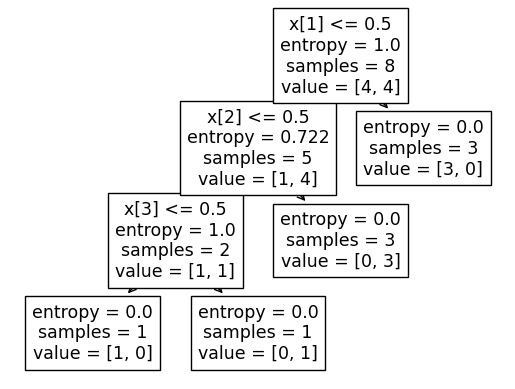

In [ ]:
# Testing scikit-learn's decision tree implementation. 
#
#  - scikit-learn's decision tree only allows binary target values.

from sklearn import tree
import numpy as np 

clf = tree.DecisionTreeClassifier(criterion="entropy")

# Enter your data here. Each row is an instance. Each column is the attribute.
# Set the first attribute value that appears in the table to be 0, and the next one as 1.
# - for example, for the Commute attribute, 2hr = 0, and 1hr = 1.
#
# X = [[0,0,0,0],
#      [0,0,0,1],
#      ... .... ... ]
#

# mock data, with only 4 instances
# - MODIFY this 
#
# Column order: Commute, JobType, Location, StockOption
# Values:
#    Commute:     1hr=0, 2hr=1
#    JobType:     researech=0, development=1
#    Location:    westcoast=0, eastcoast=1
#    StockOption: yes=1, no=0 
# Target:         N=0, Y=1
X = [[1,0,0,1], 
     [0,1,1,0],
     [0,0,1,1], 
     [1,0,1,0],
     [0,1,0,1], 
     [0,0,1,0],
     [1,1,0,0], 
     [1,0,0,0]]

# Enter the target data (AcceptJob) here. 1 = Yes. 0 = No.
# y = [1, 1, .... ]
# - MODIFY this 

y = [ 1, 
     0, 
     1, 
     1,
     0, 
     1, 
     0, 
     0]
clf = clf.fit(X, y)

# Note: value=[a,b] means "a" negative samples, and "b" positive samples [# neg = a, # pos = b]. 
#       *Note that this order is reversed, compared to the lecture slides, where we had [# pos, #neg], so you have to be careful.   
# Note: left branch is attribute value 0, right branch = attribute value 1.
# Note: X[n] means the attribute for the n-th column (n=0 is the first column in), 
#       so, for the homework problem, X[0] is Commute. X[1] is JobType, etc.

tree.plot_tree(clf)

print('test 3 novel inputs: ')
print(clf.predict([[0, 0, 0, 1], [1, 1, 1, 1], [0, 0, 0, 0]]))

# Check if the tree gives the correct answer for the mock dataset above. 


# Problem 8 : Perceptron



In [ ]:
'''
Implement perceptron in this code cell : implement the perceptron() function 

Assumptions: 2 input, 1 output perceptron. 
  Note: 1 bias unit should also be added to the input vector  (fixed value of 1.0).
        This is already done in the skeleton code. 
'''

import matplotlib.pyplot as plt
import random
import numpy as np 
import math

# example data: AND 
# -input  : [x,y] values
# -target : target values 
'''
  implement this: 
     add more samples, for OR, XOR, etc. 
'''
inputOR  = np.array(
          [[0,0], 
          [0,1], 
          [1,0], 
          [1,1]])
target0R = np.array([
          0, 
          1, 
          1, 
          1])

inputAND  = np.array(
          [[0,0], 
          [0,1], 
          [1,0], 
          [1,1]])
targetAND = np.array([
          0, 
          0, 
          0, 
          1])

inputXOR  = np.array(
          [[0,0], 
          [0,1], 
          [1,0], 
          [1,1]])
targetXOR = np.array([
          0, 
          1, 
          1, 
          0])

BIAS = -1.0 

#-----------------------------
# plot decision boundary function
#-----------------------------
def plot_decision_boundary(W):
  '''
  plot the decision boundary for weight vector W
  - fully functional 
  ''' 

  x = np.arange(0.0, 1.0, 0.05)
  y = np.arange(1.0, 0.0, -0.05)

  xx, yy = np.meshgrid(x, y)

  output = W[0]*xx + W[1]*yy + W[2]*BIAS 

  fig, ax = plt.subplots(1,1)
  
  ax.imshow(output>=0.0, extent=[0,1,0,1]) 

#-----------------------------
# perceptron function: implement this
#-----------------------------
def perceptron(inp, tgt, alpha=0.01, err_target=0.001):
  '''
  implement this 
  
  input:
    inp : input vector array
    tgt : target output array
    alpha : learning rate, default = 0.01
    err_target : target error below which to terminate 

  output: print out #epochs, error, and plot the decision boundary

  returns: Weight vector
  '''

  # compute some common sizes
  num_dat = len(tgt)
  inp_dim = len(inp[0])+1        # "+1" to add bias unit

  # add bias to input vectors
  inp = np.append(inp, BIAS*np.ones([num_dat,1]), axis=1)

  # initialize weight vector : -0.5 ~ 0.5 
  W = (np.random.rand(inp_dim)-0.5)
  
  n = 0
  error = math.inf
  while error > err_target:
  
    #--------------
    # epoch
    #--------------

    # randomize input ordering
    order = np.arange(num_dat)
    np.random.shuffle(order)

    # 1. go over each input

    total_error = 0.0

    for i in order:

      print("Input (with bias at the end)=", end='')
      print(inp[i], end=', Target=')
      print(tgt[i])

      # 1.1. activate output unit
      output = inp[i][0] * W[0] + inp[i][1] * W[1] + inp[i][2] * W[2]
      if output >= 0:
        output = 1
      if output < 0:
        output = 0
      # 1.2. compute error 
      currentError = tgt[i] - output
      # 1.3. adjust weight, based on the error  
      for j in range(3):
        W[j] = W[j] + alpha * inp[i][j] * currentError
      # 1.4. keep sum of total_error during this epoch 
      total_error = total_error + abs(currentError) 

    # 2. compute error for the epoch as the mean error from the current epoch 
    error = total_error / num_dat 

    # increment epoch count
    n = n + 1 

    if n > 30:
      break


  # Done with training 
  print('number of epochs = '+str(n))
  print('average error = '+str(error))

  # return weight vector
  return W 

#-----------------------------
# test perceptron
#-----------------------------

Input (with bias at the end)=[ 1.  1. -1.], Target=1
Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 1.  0. -1.], Target=0
Input (with bias at the end)=[ 0.  1. -1.], Target=0
Input (with bias at the end)=[ 1.  0. -1.], Target=0
Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 1.  1. -1.], Target=1
Input (with bias at the end)=[ 0.  1. -1.], Target=0
Input (with bias at the end)=[ 1.  0. -1.], Target=0
Input (with bias at the end)=[ 0.  1. -1.], Target=0
Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 1.  1. -1.], Target=1
Input (with bias at the end)=[ 1.  0. -1.], Target=0
Input (with bias at the end)=[ 0.  1. -1.], Target=0
Input (with bias at the end)=[ 1.  1. -1.], Target=1
Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 1.  0. -1.], Target=0
Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 1.  1. -1.], Ta

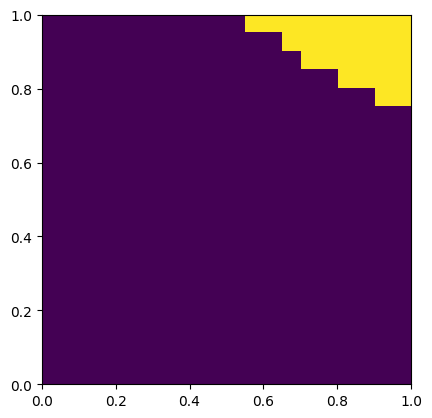

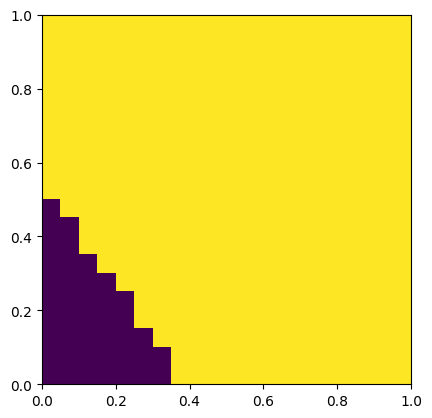

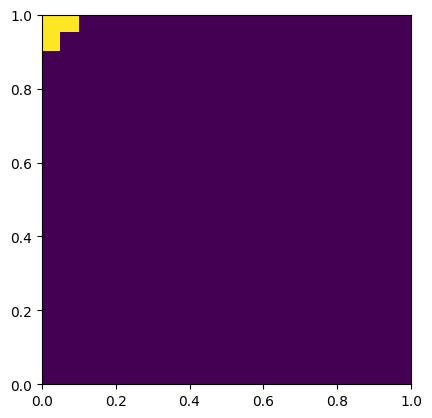

In [ ]:
# Add your test code here, for the homework questions

W = perceptron(inputAND, targetAND, 0.1, 0.001)
print('\n\nTesting plot_decision_boundary')
print(W)
plot_decision_boundary(W)

W = perceptron(inputOR, target0R, 0.1, 0.001)
print('\n\nTesting plot_decision_boundary')
print(W)
plot_decision_boundary(W)

W = perceptron(inputXOR, targetXOR, 0.1, 0.001)
print('\n\nTesting plot_decision_boundary')
print(W)
plot_decision_boundary(W)


# Problem 11: Gradient Descent Exercise (no credit)





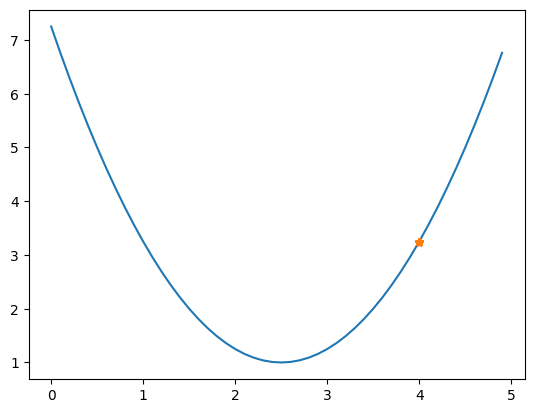

In [ ]:
# Implement your program here:

# Example program. You can modity/extend this.
#
# 1. define function 
# - this is an example (quadratic function) -- you should change it to the function given in problem 4)
# - also, you need to check for the termination condition, rather than using a fixed number of steps.
def E(w):
  '''
  implement this
  '''
  return np.power(w-2.5,2) + 1      # note: np.power() can take scalar or vector as argument.

# 2. define derivative function 
def dEdw(w):
  '''
  implement this
  '''
  return 2*(w-2.5)

# 3. gradient descent 

w = 4     # initial value
alpha = 0.8   # learning rate  ; try eta=0.8 and eta=0.001

n = 100 

w_t = np.zeros(n)   # this is w at step t
Ew_t = np.zeros(n)  # this is E(w) at step t

for i in range(n):
  ''' 
  implement this for-loop
  '''
  w_t[i]=w
  Ew_t[i]=E(w)
  # implement this: gradient descent step
  # w = .....

# 4. plot E(w) and the gradient descent steps 

# Note: adjust the range below based on the function you're given in problem 10. 
#  - right now the x axis in the plot is 0 to 5 with a step size of 0.1. 
x = np.arange(0,5,0.1)  

plt.plot(x,E(x),"-",w_t,Ew_t,"*-")


# Problem 12 : CNN

In [1]:
'''

Put your CNN code and results here. Use a separate code cell for the sub tasks.

'''
import tensorflow as tf
from tensorflow import keras

# Load MNIST data
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the LeNet model
model = keras.models.Sequential([
    # This layer uses kernal size of 5*5, padding method of "same" which preserves spatial dimension, relu activation. 
    # The input shape has width of 28, height of 28, and 1 channel
    keras.layers.Conv2D(25, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)),
    # Perform max pooling with 2x2 filters
    keras.layers.MaxPooling2D((2, 2)),
    # This layer uses kernal size of 5*5, padding method of "same" which preserves spatial dimension, relu activation
    keras.layers.Conv2D(25, (5, 5), padding='same', activation='relu'),
    # Perform max pooling with 2x2 filters
    keras.layers.MaxPooling2D((2, 2)),
    # This layer uses kernal size of 5*5, padding method of "same" which preserves spatial dimension, relu activation
    keras.layers.Conv2D(25, (5, 5), padding='same', activation='relu'),
    # Flatten data to 1D array
    keras.layers.Flatten(),
    # Construct fully connected layer with 100 unit and use relu as activation function
    keras.layers.Dense(100, activation='relu'),
    # Construct fully connected layer with 10 unit and use softmax which assign decimal probabilities for each possible label
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)



11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 159s 82ms/step - loss: 0.1340 - accuracy: 0.9583 - val_loss: 0.0479 - val_accuracy: 0.9831
Epoch 2/5
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0460 - accuracy: 0.9858 - val_loss: 0.0433 - val_accuracy: 0.9855
Epoch 3/5
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.0286 - val_accuracy: 0.9903
Epoch 4/5
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.0305 - val_accuracy: 0.9914
Epoch 5/5
313/313 [==============================] - 6s 19ms/step - loss: 0.0240 - accuracy: 0.9932
Test accuracy: 0.9932000041007996


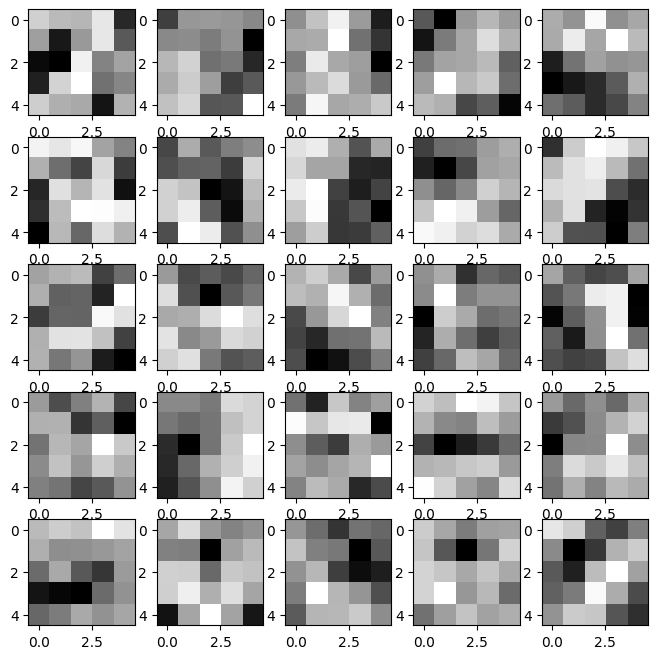

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the convolution kernels from the first conv layer
conv1_layer = model.get_layer(index=0)
conv1_kernels = conv1_layer.get_weights()[0]
fig, axs = plt.subplots(5, 5, figsize=(8, 8))
for i in range(25):
    axs[i//5, i%5].imshow(conv1_kernels[:, :, 0, i], cmap='gray')
plt.show()

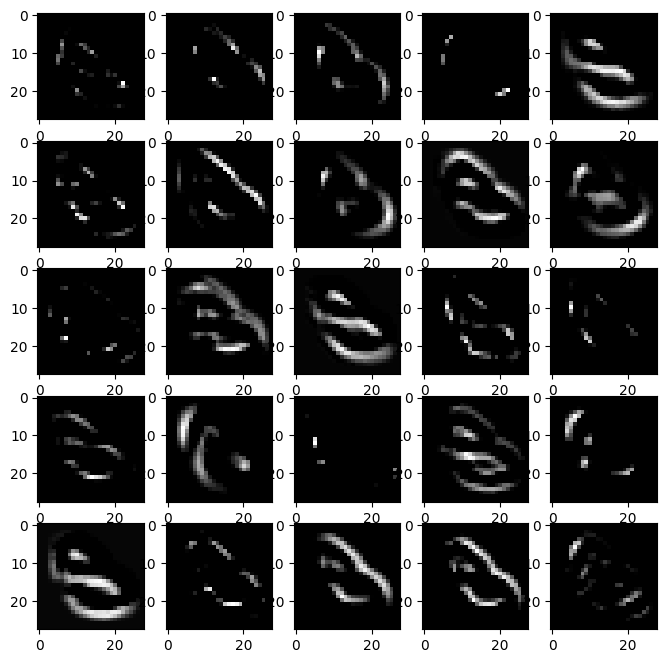

In [3]:
# Plot the feature maps from the first conv layer for an input in the "3" category
num_3 = np.argmax(y_test == 3)
input_3 = x_test[num_3, :, :, :]
feature_maps_fn = keras.backend.function([model.layers[0].input], [model.layers[0].output])
feature_maps = feature_maps_fn(np.expand_dims(input_3, axis=0))[0]
fig, axs = plt.subplots(5, 5, figsize=(8, 8))
for i in range(25):
    axs[i//5, i%5].imshow(feature_maps[0, :, :, i], cmap='gray')
plt.show()